【課題】教師なし学習とは何か記述せよ   
データを扱う前に、教師なし学習への理解の確認です。   
以下の観点を含めて文章で記述しましょう。   
以降の設問も含め、インターネットや書籍で調べても構いません。   

教師あり学習との比較   
どんなときに使うのか   
具体的にどんなものがあるのか   
【回答】     
教師あり学習は、人間等が付けたラベルによって、教えられた構造を学び取るのに対して、   
教師なし学習:は、データから規則性を発見して学び取る。   
推論、分析など、正解がない、正解が解らない問題のとき教師なし学習を用いる。   
手法としては下記のものがある。   
- クラスタリング   
    - 階層型クラスタリング   
        - 完全連結法    
        - 単連結法    
        - 群平均法    
        - ウォード法    
    - 非階層型クラスタリング    
        - k-means    
- NN    

【課題】必要なライブラリをimport   

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
import seaborn as sns

【課題】csvファイルの読み込み   

In [2]:
data = pd.read_csv('Wholesale customers data.csv')

In [3]:
print("サンプルの数：{} 　特徴量の数：{}\n".format(*data.shape))
print("各特徴量の型\n",data.dtypes,"\n")
print("統計量の要約")
display(data.describe())
display(data.head())
display(data.corr())

サンプルの数：440 　特徴量の数：8

各特徴量の型
 Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object 

統計量の要約


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


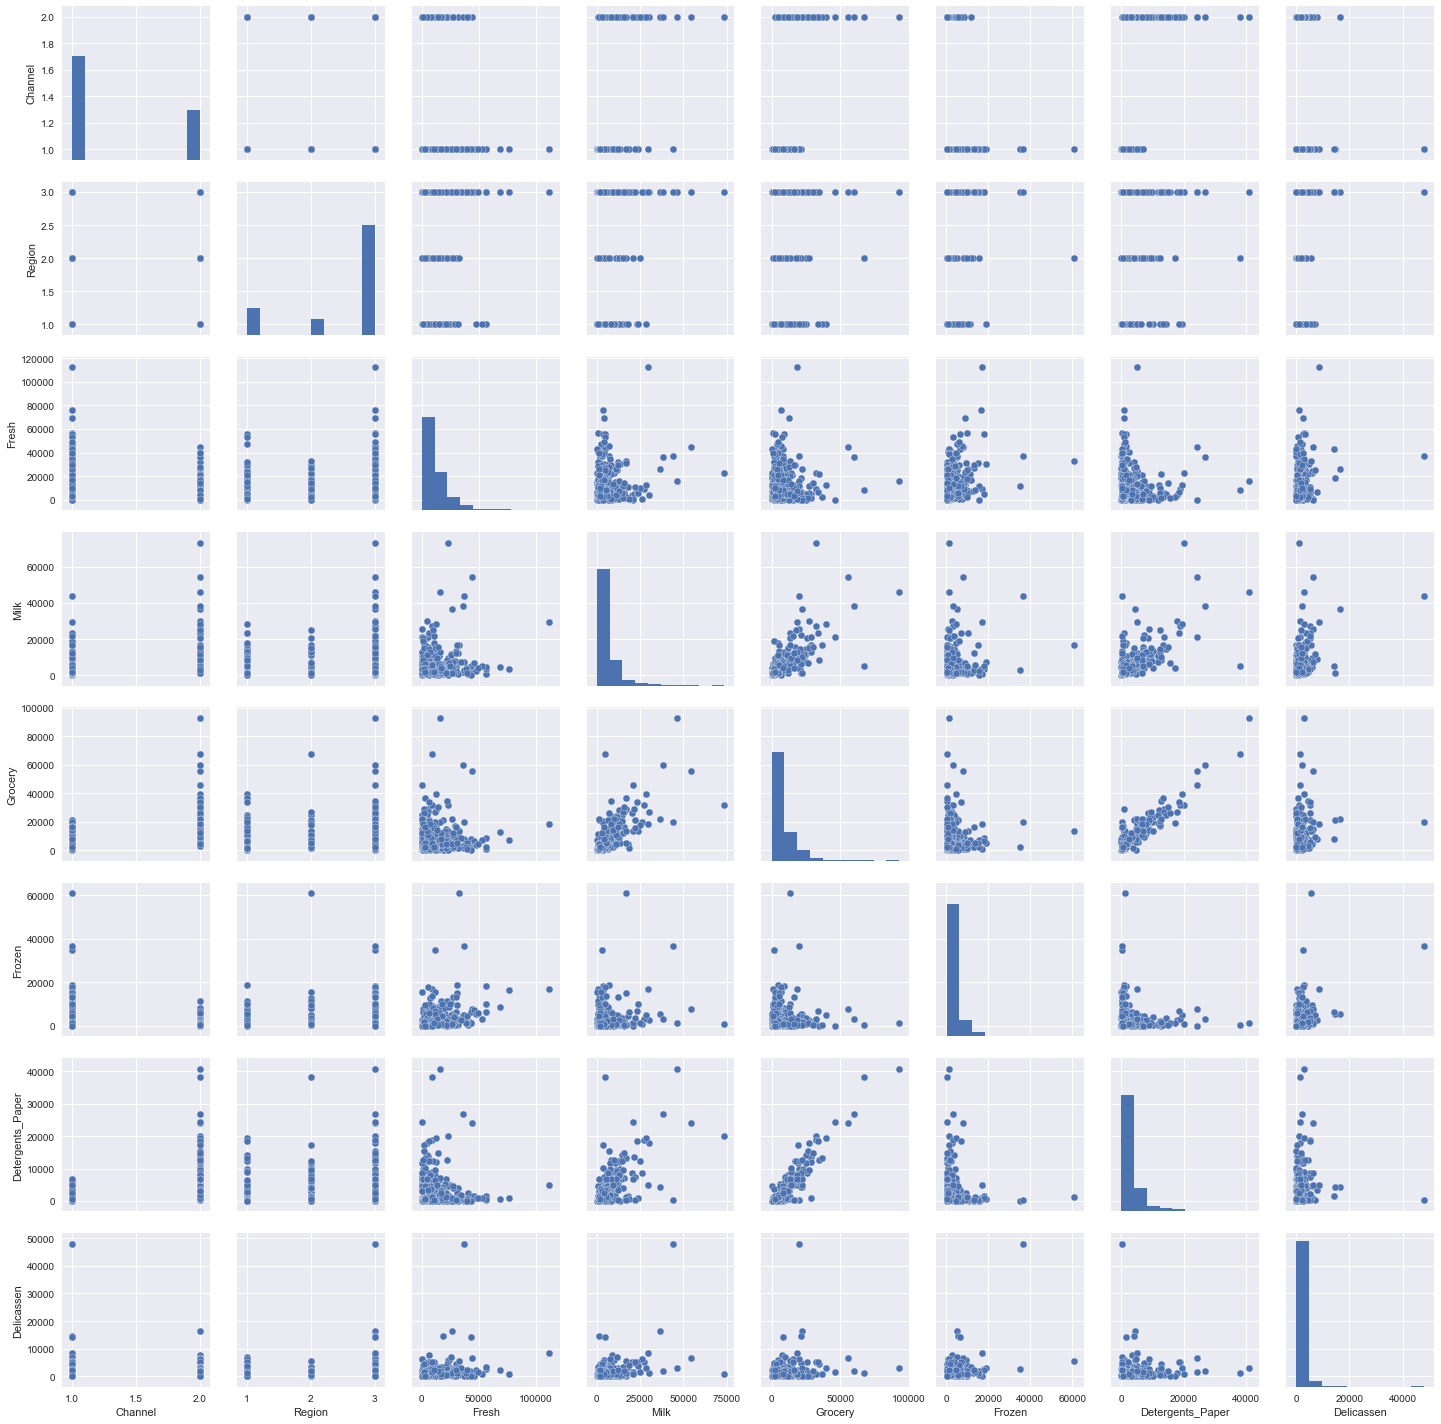

In [4]:
sns.pairplot(data)

【課題】不要な特徴量を消す   

In [5]:
#元のデータはdata_originalに格納しておく
data_original = data.copy()

#dataからChannelとRegionの2列を削除するコードを記述
data = data_original.drop(['Channel','Region'], axis=1)

#消えていることを確認
display(data.head())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d252518>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11e6ab048>]], dtype=object)

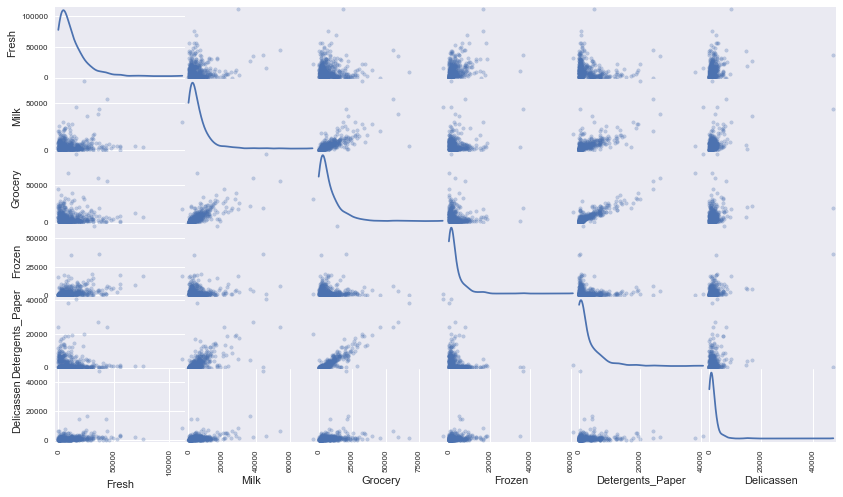

In [6]:
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')

【課題】Feature Scalingの実行   

In [7]:
data_fs = np.log(data)
display(data_fs.head())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525


【課題】なぜFeature Scalingが必要なのか記述せよ   
Feature Scalingを行う理由とはなんでしょう。文章で記述してください。   
【回答】    
標準化されていないデータは、次元によって数値の単位がバラバラだったり、あるいは大きさが極端に異なったりする。   
これをそのまま扱ってしまうと、各次元を見比べたときにそれぞれの関係が分かりにくい。   
また、機械学習においては特定の次元の影響が強く (または反対に弱く) 出てしまったりすることもあるらしい。   
そこで、それぞれの次元のスケールを同じに揃える必要がある。   

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e667b38>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11fa67630>]], dtype=object)

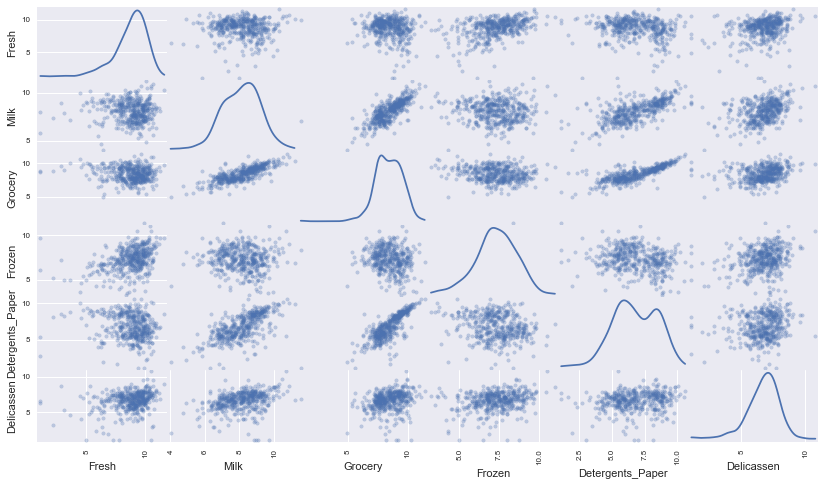

In [8]:
pd.scatter_matrix(data_fs, alpha = 0.3, figsize = (14,8), diagonal = 'kde')

【課題】PCAの実行   

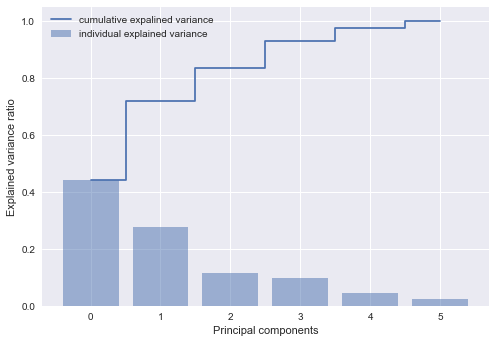

In [9]:
#data_fsに対しPCAを行い分散説明率の累積を確認
from sklearn.decomposition import PCA

pca = PCA(n_components=None)
data_fs_pca = pca.fit_transform(data_fs)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt
plt.bar(range(0,6),var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(0,6),cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [10]:
#分散説明率が70%を超える数の主成分を選び、data_pcaに格納する
data_pca = data_fs_pca[:,0:2]

【課題】なぜPCAを行うのか記述せよ   
機械学習の前処理としてなぜPCAが必要なのかについて記述してください。   
【回答】   
特徴量の個数を減らすことにより、次元の呪い（過学習）対策や、計算量の削減するため。   

【課題】クラスタリングとは何か記述せよ   
クラスタリングについての説明を記述してください。その際、以下の観点を含めてください。   

いつ何に使うのか   
階層的手法と非階層的手法との違い   
クラス分類（classification）との比較   
【回答】   
データを似ているものは同じクラスタ、違うものは別のクラスタに分ける。   
このとき正解は存在せず、あくまでそのデータの関係だけを見て判断する。   
漠然とただデータがあった所から新たに意味を見出すための道具として使える。   
階層的手法は、似ているものどうしを同じクラスタに、似てないものを別のクラスタにグルーピングしていく、      
一方、非階層的手法は、クラスタの平均を用いて与えられたクラスタ数にデータを分類する。   
クラス分類は教師あり学習、クラスタリング教師なし学習。   

【課題】樹状図を描く

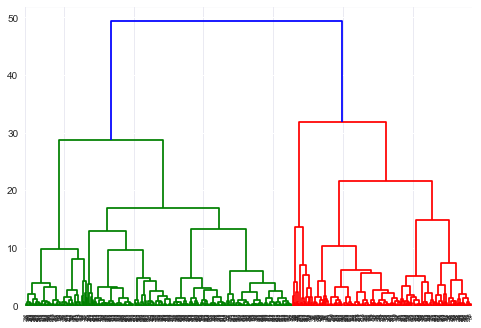

In [11]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
row_clusters = linkage(pdist(data_pca, metric='euclidean'), method='ward')
row_dender = dendrogram(row_clusters)
plt.show()

【課題】k-meansにおけるkの値の検討

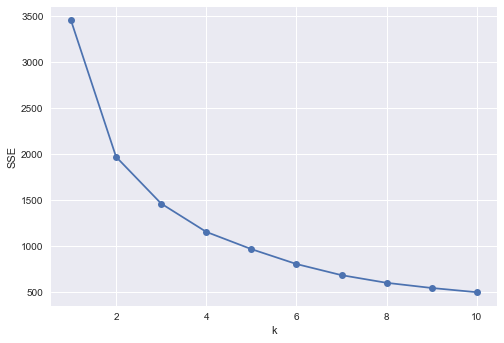

In [12]:
from sklearn.cluster import KMeans
SSE = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    km.fit(data_pca)
    SSE.append(km.inertia_)

plt.plot(range(1,11), SSE, marker='o')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

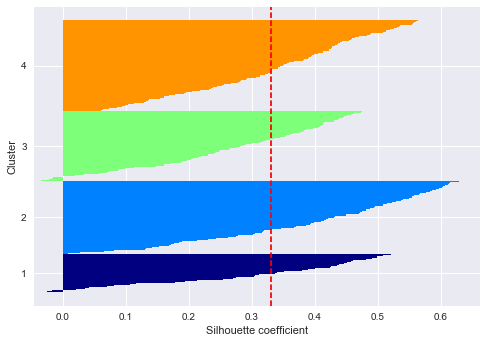

In [13]:
km = KMeans(n_clusters=4, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(data_pca)
from matplotlib import cm
from sklearn.metrics import silhouette_samples
import numpy as np
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(data_pca, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

選んだkの値と、それに決めた理由を記述してください。   
【回答】    
k=4    
理由： エルボー法により４〜６つに分けるのが良いと判断し、   
        さらにシルエット分析により４つに分けるのか適切だと考えました。　　　

【課題】k-meansの実行    

In [14]:
#k-meansを行うコードを記述
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(data_pca)

【課題】クラスタリングの可視化    

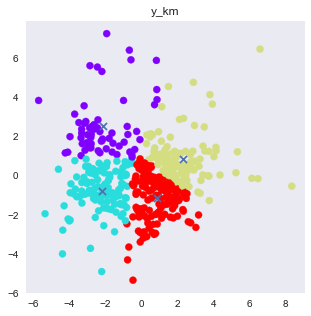

In [15]:
plt.figure(figsize =(5,5))
plt.title('y_km')
plt.scatter(data_pca[:,0], data_pca[:,1], c=y_km , marker='o', s=50, cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker='x', s=50)
plt.grid()
plt.show()

【課題】既知のグループとの比較    

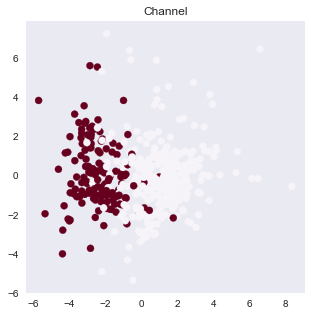

In [16]:
plt.figure(figsize =(5,5))
plt.title('Channel')
plt.scatter(data_pca[:,0], data_pca[:,1], c=data_original.iloc[:,0]  , marker='o', s=50, cmap='PuRd')
plt.grid()
plt.show()

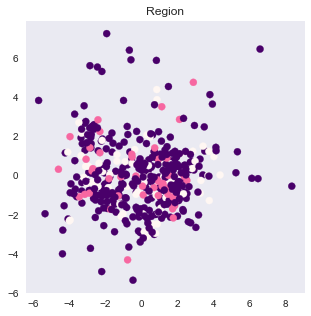

In [17]:
plt.figure(figsize =(5,5))
plt.title('Region')
plt.scatter(data_pca[:,0], data_pca[:,1], c=data_original.iloc[:,1]  , marker='o', s=50,cmap='RdPu')
plt.grid()
plt.show()

どのような結果だったかの説明を記述してください。    
【回答】    
Channelについては、４つに分けた内の２つがそれぞれのChannelと重なっている。   
Regionについては、４つに分けた領域に関係がなさそう。   

【課題】クラスタの説明   
それぞれのクラスタはどういったものなのか説明を記述してください。   
クラスタリングについては詳しくない卸売業者の経営陣に説明するような平易な書き方を心がけてください。   
【回答】   
ホテル/レストランとスーパーなどの小売では売れている商品が異なる。    
また、地域により売れている商品に違いはないようだ。   